In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from datetime import datetime

from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
import glob

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import geopandas as gp

import numpy as np

In [2]:
cd /Users/chowdahead/Documents/GitHub/folium-watch-warn/data/

/Users/chowdahead/Documents/GitHub/folium-watch-warn/data


In [3]:
today = datetime.utcnow()
today_date = f"{today:%Y_%m_%d}"
today_date

'2021_08_11'

https://tgftp.nws.noaa.gov/SL.us008001/DF.sha/DC.cap/DS.WWA/current_all.tar.gz
https://tgftp.nws.noaa.gov/SL.us008001/DF.sha/DC.cap/DS.WWA/current_hazards.tar.gz
https://tgftp.nws.noaa.gov/SL.us008001/DF.sha/DC.cap/DS.WWA/current_warnings.tar.gz

In [4]:
current_all_zip = "current_all.tar.gz"
current_haz_zip = "current_hazards.tar.gz"
current_warn_zip = "current_warnings.tar.gz"
current_all = "current_all"
current_haz = "current_hazards"
current_warn = "current_warnings"
base = "https://tgftp.nws.noaa.gov/SL.us008001/DF.sha/DC.cap/DS.WWA/"

In [5]:
! mkdir $today_date/ 

In [8]:
import os 

In [9]:
os.chdir(today_date) 

In [10]:
pwd

'/Users/chowdahead/Documents/GitHub/folium-watch-warn/data/2021_08_11'

In [ ]:
! time curl -L "$base"/"$current_haz_zip" > "$current_haz_zip"

In [13]:

! mkdir "$current_haz"/
! tar xvzf "$current_haz_zip" -C "$current_haz"/

x current_hazards.shp
x current_hazards.shx
x current_hazards.dbf
x current_hazards.cpg
x current_hazards.prj


In [ ]:
! curl -L "$base"/"$current_warn_zip" > "$current_warn_zip"

In [15]:
! mkdir "$current_warn"/
! tar xvzf "$current_warn" -C "$current_warn"/

mkdir: current_warnings/: File exists
tar: Unrecognized archive format
tar: Error exit delayed from previous errors.


PATH = f"DAY{day_num}_SIGWX_latest"
PATH

In [17]:
pwd

'/Users/chowdahead/Documents/GitHub/folium-watch-warn/data/2021_08_11'

In [18]:
path = f"{current_warn}"
shp =  glob.glob(f"{path}/*.shp")
shp

['current_warnings/current_warnings.shp']

In [19]:

shp = shp[0]
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
usa = gp.read_file(shp)
print(f"Shape of the dataframe: {usa.shape}\n")
usa.crs


Shape of the dataframe: (43, 14)



{'init': 'epsg:4326'}

In [20]:
#usa #last 5 records in dataframe
usa

,CAP_ID,VTEC,PHENOM,SIG,WFO,EVENT,ISSUANCE,EXPIRATION,ONSET,ENDS,URL,MSG_TYPE,PROD_TYPE,geometry
0,urn:oid:2.49.0.1.840.0.180f3d72e64db8c8192e51c...,/O.CON.KILN.SV.W.0089.000000T0000Z-210811T2015Z/,SV,W,KILN,0089,2021-08-11T16:01:00-04:00,2021-08-11T16:15:00-04:00,2021-08-11T16:01:00-04:00,2021-08-11T16:15:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVS,Severe Thunderstorm Warning,"POLYGON ((-84.01000 40.34000, -84.81000 40.060..."
1,urn:oid:2.49.0.1.840.0.132bc887da2817c26c7ed36...,/O.CON.KAPX.SV.W.0030.000000T0000Z-210811T2030Z/,SV,W,KAPX,0030,2021-08-11T16:01:00-04:00,2021-08-11T16:30:00-04:00,2021-08-11T16:01:00-04:00,2021-08-11T16:30:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVS,Severe Thunderstorm Warning,"POLYGON ((-84.12000 46.53000, -84.15000 46.410..."
2,urn:oid:2.49.0.1.840.0.92ce1b2bba642c805a696ce...,/O.NEW.KGSP.SV.W.0104.210811T2001Z-210811T2045Z/,SV,W,KGSP,0104,2021-08-11T16:01:00-04:00,2021-08-11T16:45:00-04:00,2021-08-11T16:01:00-04:00,2021-08-11T16:45:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVR,Severe Thunderstorm Warning,"POLYGON ((-81.98000 35.23000, -81.97000 35.220..."
3,urn:oid:2.49.0.1.840.0.38ee497a2fbbeec0c09b787...,/O.CON.KCLE.SV.W.0076.000000T0000Z-210811T2030Z/,SV,W,KCLE,0076,2021-08-11T16:00:00-04:00,2021-08-11T16:30:00-04:00,2021-08-11T16:00:00-04:00,2021-08-11T16:30:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVS,Severe Thunderstorm Warning,"POLYGON ((-83.57000 41.73000, -83.47000 41.730..."
4,urn:oid:2.49.0.1.840.0.78e72b6b387ff1b73e035f7...,/O.CON.KGRB.TO.W.0012.000000T0000Z-210811T2030Z/,TO,W,KGRB,0012,2021-08-11T15:00:00-05:00,2021-08-11T15:30:00-05:00,2021-08-11T15:00:00-05:00,2021-08-11T15:30:00-05:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVS,Tornado Warning,"POLYGON ((-89.23000 44.87000, -89.23000 44.680..."
5,urn:oid:2.49.0.1.840.0.f81e7d2e58dd4b021e488b5...,/O.CON.KGRB.SV.W.0079.000000T0000Z-210811T2030Z/,SV,W,KGRB,0079,2021-08-11T14:59:00-05:00,2021-08-11T15:30:00-05:00,2021-08-11T14:59:00-05:00,2021-08-11T15:30:00-05:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVS,Severe Thunderstorm Warning,"POLYGON ((-89.60000 44.08000, -88.89000 44.230..."
6,urn:oid:2.49.0.1.840.0.f02bd0f4ac8fca895090957...,/O.NEW.KKEY.MA.W.0131.210811T1959Z-210811T2030Z/,MA,W,KKEY,0131,2021-08-11T15:59:00-04:00,2021-08-11T16:30:00-04:00,2021-08-11T15:59:00-04:00,2021-08-11T16:30:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SMW,Special Marine Warning,"POLYGON ((-81.81000 25.53000, -81.67000 25.510..."
7,urn:oid:2.49.0.1.840.0.67e9004fd9f4dd2743c140a...,/O.CON.KDTX.SV.W.0076.000000T0000Z-210811T2045Z/,SV,W,KDTX,0076,2021-08-11T15:59:00-04:00,2021-08-11T16:45:00-04:00,2021-08-11T15:59:00-04:00,2021-08-11T16:45:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SVS,Severe Thunderstorm Warning,"POLYGON ((-82.39000 42.97000, -82.45000 42.940..."
8,urn:oid:2.49.0.1.840.0.d9903fc614e0ff9f8be53d6...,/O.CON.KDTX.MA.W.0052.000000T0000Z-210811T2045Z/,MA,W,KDTX,0052,2021-08-11T15:58:00-04:00,2021-08-11T16:45:00-04:00,2021-08-11T15:58:00-04:00,2021-08-11T16:45:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,MWS,Special Marine Warning,"POLYGON ((-83.50000 41.73000, -83.49000 41.800..."
9,urn:oid:2.49.0.1.840.0.dccc90596a5d73459e56db4...,/O.NEW.KAPX.MA.W.0032.210811T1958Z-210811T2130Z/,MA,W,KAPX,0032,2021-08-11T15:58:00-04:00,2021-08-11T17:30:00-04:00,2021-08-11T15:58:00-04:00,2021-08-11T17:30:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,SMW,Special Marine Warning,"POLYGON ((-84.11000 46.50000, -84.11000 46.240..."


In [21]:
pop_tots = usa["PROD_TYPE"].unique()
len(pop_tots)

4

In [22]:
lkly = usa[usa.PROD_TYPE == pop_tots[0]]
poss = usa[usa.PROD_TYPE == pop_tots[2]]
occ = usa[usa.PROD_TYPE == pop_tots[1]]

In [23]:
crs = usa.crs
crs

{'init': 'epsg:4326'}

In [24]:
clrs = ["w","grey","yellow","goldenrod","green","lightblue","blue","purple","red","pink"]

In [10]:
pop_tots[0]

'Flood Warning'

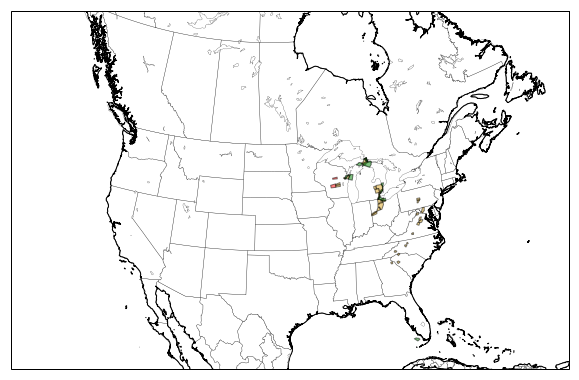

In [28]:
# Set Projection of Plot
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)
    
# Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-130., -65, 20., 60.]
    
    
fig = plt.figure(figsize=(10., 8.))
    
    
                                        # Add the Map 
#---------------------------------------------------------------------------------------------------
ax = plt.subplot(111, projection=plotcrs)
    
    
# Set extent and plot map lines
ax.set_extent(extent)
         
ax.coastlines(resolution='10m')
    

    
state_borders = cfeature.NaturalEarthFeature(
                    category='cultural', name='admin_1_states_provinces_lines',
                    scale='10m',facecolor='none')
ax.add_feature(state_borders, edgecolor='k', linewidth=0.35)
        
country_borders = cfeature.NaturalEarthFeature(category='cultural',
                    name='admin_0_countries',scale='10m', facecolor='none')
ax.add_feature(country_borders,edgecolor='k',linewidth=0.2)
    
    
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        facecolor="w")
ax.add_feature(lakes,edgecolor='k',linewidth=0.2)
#ax.add_feature(cfeature.BORDERS,edgecolor="w")
ax.add_feature(cfeature.LAND,facecolor="w",linewidth=0.2)
ax.add_feature(cfeature.OCEAN,facecolor="w",linewidth=0.2,edgecolor="k")

#ax.add_feature(COUNTIES)
#for i,_ in enumerate(qpf_tots):
#    ax.add_geometries(usa["geometry"][i],crs=ccrs.PlateCarree(),
#                  facecolor=clrs[i],alpha=0.5)
#pop_tots
#ax.add_geometries(usa["geometry"][usa["QPF"]==qpf_tots[5]],crs=ccrs.PlateCarree(),
#                  facecolor=,alpha=0.5)

#for i,_ in enumerate(qpf_tots):
#    ax.add_geometries(usa["geometry"][usa["QPF"]==qpf_tots[i]],crs=ccrs.PlateCarree(),
#                  facecolor=clrs[i],alpha=0.5)
# define the bins and normalize
#bounds = np.linspace(0, 2, 0.25)
#cmap = plt.cm.get_cmap('PiYG', len(qpf_tots))
#cb = plt.colorbar(ax, cmap=cmap,
#    spacing='proportional', ticks=qpf_tots, boundaries=qpf_tots, format='%1i')

ax.add_geometries(lkly["geometry"],crs=ccrs.PlateCarree(),
                  facecolor="goldenrod",edgecolor="k",alpha=0.5)
ax.add_geometries(poss["geometry"],crs=ccrs.PlateCarree(),
                  facecolor="green",edgecolor="k",alpha=0.5)
ax.add_geometries(occ["geometry"],crs=ccrs.PlateCarree(),
                  facecolor="red",edgecolor="k",alpha=0.5)

#ax.add_geometries(high["geometry"],crs=ccrs.PlateCarree(),facecolor="r",edgecolor="k",alpha=0.5)

#ax.text(-129.5,20.3, "Slight (10-39%)", size=18,
#        color="b", bbox=dict(fc="none"),transform=ccrs.PlateCarree())

outline_effect = [patheffects.withStroke(linewidth=1.5, foreground='k')] 
texts = ['Elevated','Critical','Extreme']
colors = ['orange','red','#FF69B4']
Texts = []
# Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
'''
img = plt.imshow(np.array([[0,1]]), cmap=cmap)
img.set_visible(False)
axins1 = inset_axes(ax,
                    width="50%",  # width = 10% of parent_bbox width
                    height="5%",  # height : 50%
                    loc="upper left",
                   borderpad=0.1)
    #im1 = ax1.imshow([[1, 2], [2, 3]])

Y = 0.45
cbar = plt.colorbar(img, cax=axins1, orientation="horizontal",ticks=[-5.,0,2,4,6])
cbar.set_ticks([])
cbar.ax.set_xticklabels([])
cbar.ax.text(0.05, Y, qpf_tots[0], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.15, Y, qpf_tots[1], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.25, Y, qpf_tots[2], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.35, Y, qpf_tots[3], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.45, Y, qpf_tots[4], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.55, Y, qpf_tots[5], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.65, Y, qpf_tots[6], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.75, Y, qpf_tots[7], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.85, Y, qpf_tots[8], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
cbar.ax.text(0.95, Y, qpf_tots[9], size=7, ha='center', va='center',path_effects=outline_effect,color="w")
'''
'''
for t,c in zip(qpf_tots,clrs):
    Texts.append(TextArea(t,textprops=dict(color=c,fontsize=8,path_effects=outline_effect)))
    
texts_vbox = VPacker(children=Texts,pad=1,sep=5)
ann = AnnotationBbox(texts_vbox,(.012,0.1),xycoords=ax.transAxes,
                            box_alignment=(0,.5),bboxprops = 
                            dict(facecolor='k',boxstyle='round',edgecolor='k'))
ann.set_figure(fig)
fig.artists.append(ann)
'''
#prod = usa['PRODUCT'][0].replace("probability","prob.").replace("greater than",">").replace("inches","in.")

#outline_effect2 = [patheffects.withStroke(linewidth=1.5, foreground='w')] 
#ax.set_title(f"PoP",loc='right',color='k', fontsize=12, weight='bold',
#            path_effects=outline_effect2)

#ax.set_title(usa["VALID_DATE"][0],loc='left',color='k', fontsize=12, weight='bold',
#            path_effects=outline_effect2)

#prod_time = ax.text(0.99, 0.01,f"Day {day_num} QPF ({usa.UNITS[0]})" ,
#                            horizontalalignment='right', transform=ax.transAxes,
#                            color='white', fontsize=7, weight='bold')

#prod_time.set_path_effects(outline_effect)
    

fig.savefig(f"{today_date}_hazards.png",bbox_inches="tight",dpi=120)